# Listing all possible power values

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mogdevice.qrf import QRF
from mogdevice.utils import dBm_to_mW

Here, we get all the possible power values that the QRF can output. Note that these values may vary from device to device.

In [6]:
qrf = QRF("192.168.123.51")
qrf.info

'QRF B3040-241-R3 0.5.2  A02007'

Removing the limit of power values to actually get all possible values:

In [7]:
qrf.channels[2].limit = 50
qrf.channels[2].limit

34.5

Set all the possible values for the amplitude by iterating through all 1024 internal amplitude scale values possible. The command returns the power in dBm.

In [11]:
power_values = []
for i in range(1024):
    qrf.channels[2].power = hex(i)
    power_values.append(qrf.channels[2].power)
power_values = np.array(power_values)

Plot the result:

Text(0.5, 0, 'entry number')

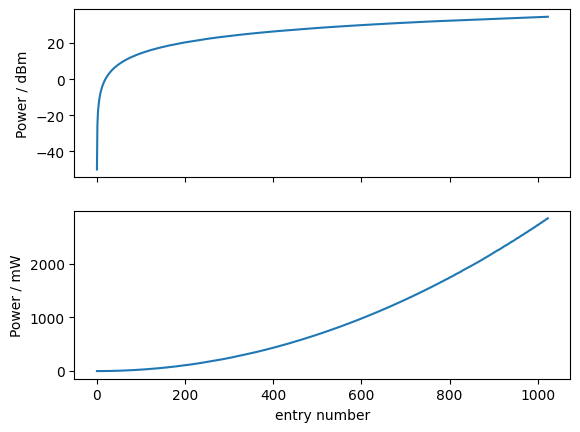

In [17]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(power_values)
ax1.set_ylabel('Power / dBm')
ax2.plot(dBm_to_mW(power_values))
ax2.set_ylabel('Power / mW')
ax2.set_xlabel('entry number')

Save the values to a file for later use.

<IPython.core.display.Javascript object>


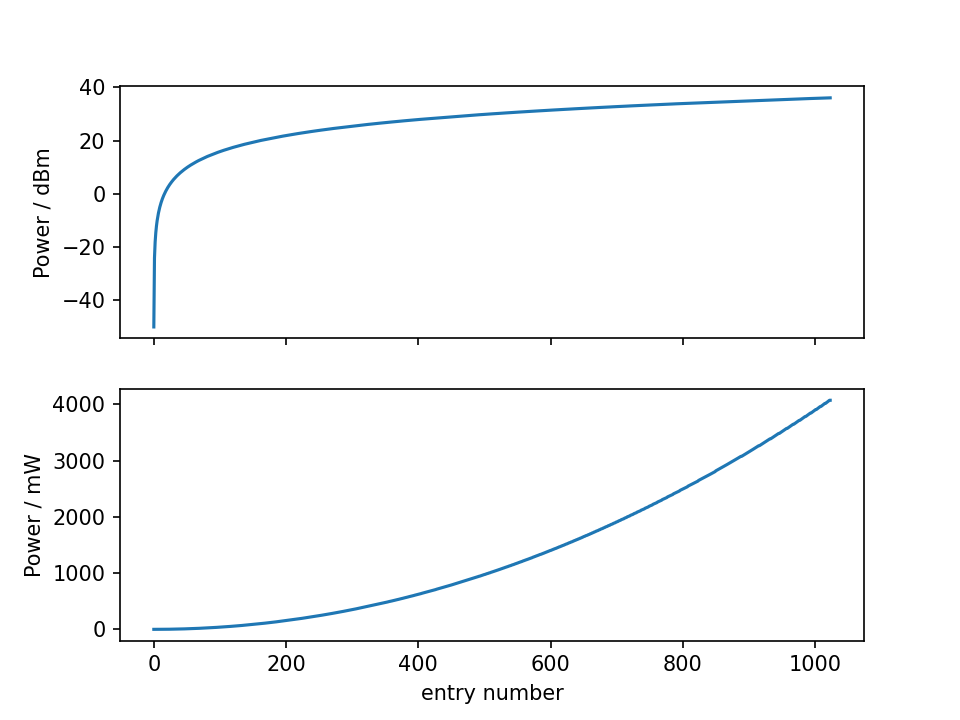

Text(0.5, 0, 'entry number')

In [6]:
np.savetxt('possible_power_values.txt', power_values)